In [32]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# Convert object to numbers by one hot encoding

insurance_onehot = pd.get_dummies(insurance)
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
X = insurance_onehot.drop("charges",axis=1)
y = insurance_onehot["charges"]

X_np = X.to_numpy()
y_np = y.to_numpy()

(1338, 11) (1338,)


In [22]:
scalar = StandardScaler()

X_train , X_test , y_train , y_test = train_test_split(X_np,y_np,test_size=0.2,shuffle=False,random_state=42)

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [41]:
tf.random.set_seed(42)

model = Sequential(
    [
        Dense(100,activation='relu'),
        Dense(10,activation='relu'), 
        Dense(1)
    ]
)

early_stopping = EarlyStopping(monitor='loss',patience=50)

model.compile(loss = MeanAbsoluteError,
              optimizer = Adam(learning_rate=0.01),
              metrics = ["MeanAbsoluteError"])

model.fit(X_train_scaled,y_train,epochs=500,callbacks=[early_stopping])

y_pred = model.predict(X_test_scaled)

mae = MeanAbsoluteError()(y_test,y_pred)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 13200.3379 - loss: 13200.3379
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MeanAbsoluteError: 13014.0273 - loss: 13014.0273
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MeanAbsoluteError: 12097.8184 - loss: 12097.8184
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MeanAbsoluteError: 9915.4883 - loss: 9915.4883  
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MeanAbsoluteError: 6988.4209 - loss: 6988.4209
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MeanAbsoluteError: 4634.4790 - loss: 4634.4790 
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MeanAbsoluteError: 3570.1885 - loss: 3570.1885
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MeanAbsoluteError: 3242.1841 - loss: 3242.1841
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MeanAbsoluteError: 3124.5283 - loss: 3124.5283
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MeanAbsoluteError: 3044.6804 - loss: 

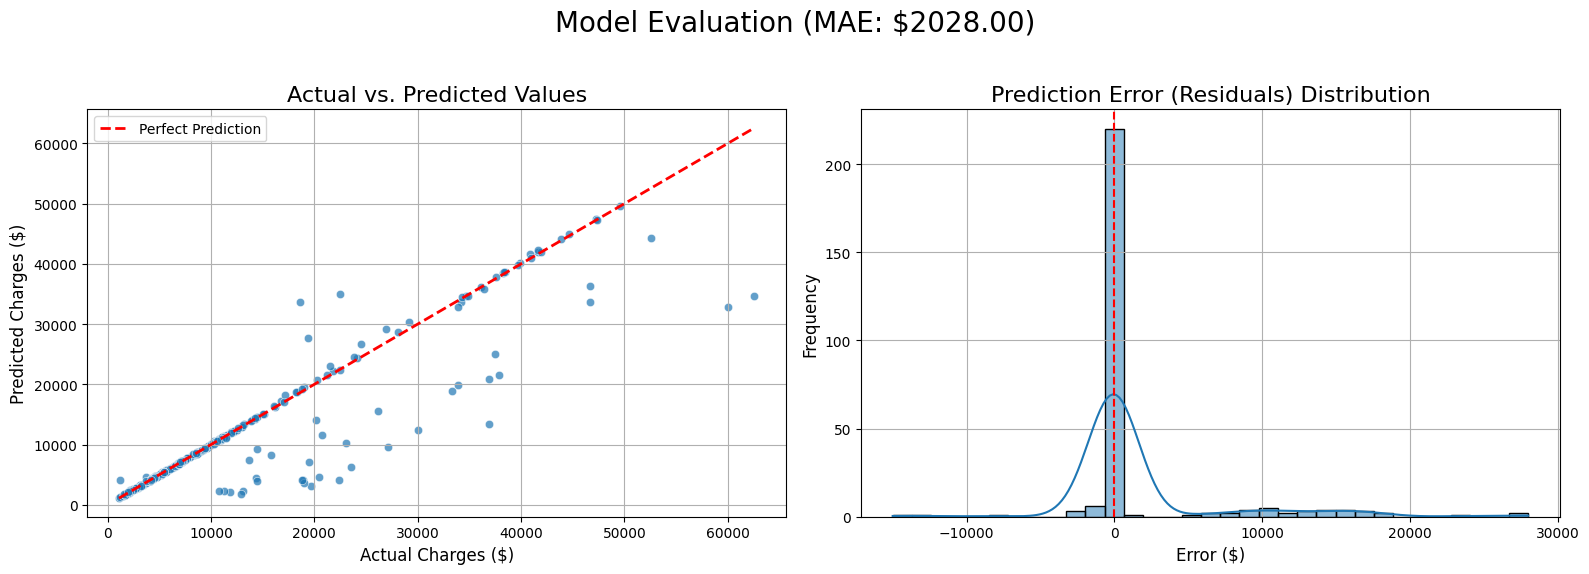

In [42]:
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()


mae = np.mean(np.abs(y_test_flat - y_pred_flat))


fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'Model Evaluation (MAE: ${mae:.2f})', fontsize=20)


sns.scatterplot(x=y_test_flat, y=y_pred_flat, alpha=0.7, ax=axes[0])
axes[0].set_title('Actual vs. Predicted Values', fontsize=16)
axes[0].set_xlabel('Actual Charges ($)', fontsize=12)
axes[0].set_ylabel('Predicted Charges ($)', fontsize=12)
axes[0].grid(True)


perfect_line_coords = [min(y_test_flat.min(), y_pred_flat.min()), max(y_test_flat.max(), y_pred_flat.max())]
axes[0].plot(perfect_line_coords, perfect_line_coords, color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
axes[0].legend()


residuals = y_test_flat - y_pred_flat
sns.histplot(residuals, kde=True, ax=axes[1])
axes[1].set_title('Prediction Error (Residuals) Distribution', fontsize=16)
axes[1].set_xlabel('Error ($)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(True)


axes[1].axvline(0, color='red', linestyle='--')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()